https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

Notions :

* Edge Betweenness Centrality (EBC)
* Girvan-Newman algorithm

In [1]:
import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

# Graphe

In [15]:
# Club de karaté

G = nx.karate_club_graph()

C:\Users\FAB\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\FAB\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


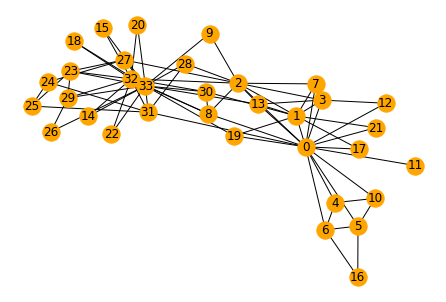

In [16]:
nx.draw( G , node_color = 'orange' , with_labels = True )

In [4]:
# Noeuds et liaisons du graphe :
print( ( len( G.nodes ) , len( G.edges ) ) )

(34, 78)


# Fonctions pour constituer les communautés au sein du graphe

In [5]:
# Supprimer la liaison avec le plus grand score EBC

def edge_to_remove( graph ) :
    
    G_dict = nx.edge_betweenness_centrality( graph )
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    # ?? A creuser
    for key , value in sorted( G_dict.items() , key = lambda item : item[1] , reverse = True ) :
        edge = key
        break

    return edge

In [6]:
# Partition du graphe en communautés


def girvan_newman( graph ) :
    
    sg = nx.connected_components( graph )
    sg_count = nx.number_connected_components( graph )
    
    while( sg_count == 1 ) :
        # voir foncton edge_to_remove ci-dessus
        graph.remove_edge( edge_to_remove( graph )[ 0 ] , edge_to_remove( graph )[ 1 ] )
        sg = nx.connected_components( graph )
        sg_count = nx.number_connected_components( graph )
        
    return sg

# Communautés au sein du graphe

In [7]:
c = girvan_newman( G.copy() )

# Noeuds constituant les communautés :

node_groups = []

for i in c :
    node_groups.append( list( i ) )

In [8]:
print( node_groups )

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


In [12]:
len( node_groups )

2

# Représentation graphique des communautés

C:\Users\FAB\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\FAB\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


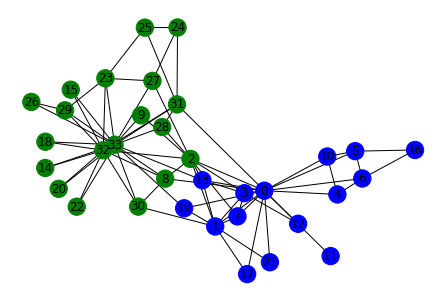

In [9]:
color_map = []

# Couleurs de chaque noeud suivant appartenance communauté
#
# Evolution attribuer n couleurs si n communautés ( len( node_groups ) )
#

for node in G :
    if node in node_groups[ 0 ] :
        color_map.append( 'blue' )
    else: 
        color_map.append( 'green' )  

nx.draw( G , node_color = color_map , with_labels = True )

plt.show()